# 第7章: 単語ベクトル
単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して，以下の処理を行うプログラムを作成せよ．

## 60. 単語ベクトルの読み込みと表示
Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

In [1]:
!ls data/GoogleNews-vectors-negative300.magnitude

data/GoogleNews-vectors-negative300.magnitude


In [1]:
from gensim.models import KeyedVectors
from logzero import logger

# Load Google's pre-trained Word2Vec model.
vec_path = 'data/GoogleNews-vectors-negative300.bin'
logger.info('started loading word2vec! file: {}'.format(vec_path))
model = KeyedVectors.load_word2vec_format(vec_path, binary=True)  # dataがbinary dataなのでbinary = True
logger.info('done!')

[I 201109 10:12:41 <ipython-input-1-a4ada08b5993>:6] started loading word2vec! file: data/GoogleNews-vectors-negative300.bin
[I 201109 10:14:13 <ipython-input-1-a4ada08b5993>:8] done!


In [2]:
from pymagnitude import Magnitude
magnitude_file = 'data/GoogleNews-vectors-negative300.magnitude'
model = Magnitude(magnitude_file)

In [4]:
print('vocab size:', len(model), model.dim)
print('dim:', model.dim)
print(model.query('United_States')[:10])

vocab size: 3000000 300
dim: 300
[-0.0168867 -0.0225916  0.1099916  0.081695  -0.0684595 -0.0346862
 -0.0474653 -0.0360553  0.0511164 -0.0266992]


## 61. 単語の類似度
“United States”と”U.S.”のコサイン類似度を計算せよ．

In [5]:
from pprint import pprint

In [6]:
%%time
pprint(model.similarity('United_States', 'U.S.'))

0.7310774
CPU times: user 13.1 ms, sys: 3.67 ms, total: 16.8 ms
Wall time: 19.1 ms


## 62. 類似度の高い単語10件
“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

In [8]:
%%time
pprint(model.most_similar('United_States', topn=10))

[('Unites_States', 0.78772485),
 ('Untied_States', 0.75413704),
 ('United_Sates', 0.7400725),
 ('U.S.', 0.73107743),
 ('theUnited_States', 0.6404394),
 ('America', 0.617841),
 ('UnitedStates', 0.61673117),
 ('Europe', 0.6132989),
 ('countries', 0.60448045),
 ('Canada', 0.601907)]
CPU times: user 1.04 ms, sys: 414 µs, total: 1.46 ms
Wall time: 1.26 ms


## 63. 加法構成性によるアナロジー
“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [79]:
%%time
pprint(model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'], topn=10))

[('Greece', 0.6898481249809265),
 ('Aristeidis_Grigoriadis', 0.5606848001480103),
 ('Ioannis_Drymonakos', 0.5552908778190613),
 ('Greeks', 0.545068621635437),
 ('Ioannis_Christou', 0.5400862693786621),
 ('Hrysopiyi_Devetzi', 0.5248444676399231),
 ('Heraklio', 0.5207759737968445),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166866183280945),
 ('Iraklion', 0.5146791934967041)]
CPU times: user 557 ms, sys: 18.2 ms, total: 575 ms
Wall time: 330 ms


## 64. アナロジーデータでの実験
単語アナロジーの評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [11]:
analogy_path = 'data/questions-words.txt'
write_file_path = 'work/questions-words_sim_magnitude.txt'

with open(analogy_path, 'r') as read_fi,open(write_file_path,'w') as write_fi:
    for line in read_fi:
        line = line.strip()
        if line.startswith(':'):  # :から始まる行は類似度の計算なしなのでそのまま書き込む
            print(line,file=write_fi)
            logger.info('{} start!'.format(line))
        else:
            first_word, second_word, third_word, _ = line.split()
            most_sim_word,most_sim = magnitude_model.most_similar(positive=[second_word, third_word], negative=[first_word], topn=1)[0]
            print(line, most_sim_word, most_sim, sep=' ', file=write_fi)
    logger.info('done!')

[I 201030 13:00:22 <ipython-input-11-29cabb41bd9f>:9] : capital-common-countries start!
[I 201030 13:03:02 <ipython-input-11-29cabb41bd9f>:9] : capital-world start!
[I 201030 13:26:33 <ipython-input-11-29cabb41bd9f>:9] : currency start!
[I 201030 13:31:08 <ipython-input-11-29cabb41bd9f>:9] : city-in-state start!
[I 201030 13:44:57 <ipython-input-11-29cabb41bd9f>:9] : family start!
[I 201030 13:47:36 <ipython-input-11-29cabb41bd9f>:9] : gram1-adjective-to-adverb start!
[I 201030 13:54:16 <ipython-input-11-29cabb41bd9f>:9] : gram2-opposite start!
[I 201030 13:58:42 <ipython-input-11-29cabb41bd9f>:9] : gram3-comparative start!
[I 201030 14:05:08 <ipython-input-11-29cabb41bd9f>:9] : gram4-superlative start!
[I 201030 14:11:15 <ipython-input-11-29cabb41bd9f>:9] : gram5-present-participle start!
[I 201030 14:16:06 <ipython-input-11-29cabb41bd9f>:9] : gram6-nationality-adjective start!
[I 201030 14:24:08 <ipython-input-11-29cabb41bd9f>:9] : gram7-past-tense start!
[I 201030 14:31:09 <ipython-

## 65. アナロジータスクでの正解率
64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

In [1]:
!grep -e "gram1" -n work/questions-words_sim.txt

8875:: gram1-adjective-to-adverb


In [2]:
!grep -e "gram1" -n work/questions-words_sim.txt | sed -e 's/:.*//g'

8875


よって文法的アナロジーは8875行からであることがわかる

In [6]:
from itertools import islice
from sklearn.metrics import accuracy_score

In [7]:
def accuracy(file:str, start:int, end:int) -> float:
    """
    正解率を計算する
    Parameters
    ----------
    file : str
        計算データを含む対象ファイルのpath
    start,end : int,int
        計算する対象データのファイルにおける開始行と終了行
    """
    correct, data_num = 0, 0  # correct:正解数　data_num:データ数
    
    with open(file) as fi:
        for line in islice(fi,start,end):
            if not line.startswith(':'):
                *_, gold, pred, _ = line.strip().split()
                if gold == pred:correct += 1
                data_num += 1
    return correct / data_num

In [8]:
result_path = 'work/questions-words_sim.txt'  # Q64の実行結果ファイル

print('semantic  analogy accuracy : {}'.format(accuracy(result_path, 0, 8874)))  # 意味的アナロジーの正解率の計算・出力
print('syntactic analogy accuracy : {}'.format(accuracy(result_path, 8875, 19558)))  # 文法的アナロジーの正解率の計算・出力

semantic  analogy accuracy : 0.7308602999210734
syntactic analogy accuracy : 0.7400468384074942


In [9]:
magnitude_result_path = 'work/questions-words_sim_magnitude.txt'  # Q64の実行結果ファイル(magnitude)

print('semantic  analogy accuracy : {}'.format(accuracy(magnitude_result_path, 0, 8874)))  # 意味的アナロジーの正解率の計算・出力
print('syntactic analogy accuracy : {}'.format(accuracy(magnitude_result_path, 8875, 19558)))  # 文法的アナロジーの正解率の計算・出力

semantic  analogy accuracy : 0.7308602999210734
syntactic analogy accuracy : 0.7400468384074942


## 66. WordSimilarity-353での評価
The WordSimilarity-353 Test Collectionの評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr

In [59]:
df = pd.read_csv('data/wordsim353/combined.csv', header=0)  # ヘッダー有
row_num = df.shape[0]  # 行数の取得
new_df = df.assign(Vector=0.)  # 単語ベクトルで計算される類似度を代入するための列
for i in range(new_df.shape[0]):
    new_df.at[i, 'Vector'] = model.similarity(new_df['Word 1'][i],new_df['Word 2'][i])

In [60]:
ranked_df = new_df.rank(ascending=False)  # 降順でランキング　vectorとHuman(mean)にそれぞれ順位が表示されるようになる
ranked_df

,Word 1,Word 2,Human (mean),Vector
0,174.0,61.0,143.5,164.0
1,22.5,305.5,109.5,38.0
2,22.5,28.0,1.0,1.0
3,314.5,120.0,98.5,95.0
4,289.0,183.0,82.0,81.0
...,...,...,...,...
348,63.5,232.0,194.0,272.0
349,3.0,227.0,35.5,97.0
350,255.0,335.0,181.5,256.0
351,206.5,126.0,173.5,142.0


In [61]:
# 解法1 scipyでスピアマン相関係数の計算（p値も返ってくる）　　小さいほど偶然じゃない
rho, p_value = spearmanr(ranked_df['Human (mean)'], ranked_df['Vector'])  # 引数はarray_likeをとるのでリストやnumpy.ndarrayでなくても可
print('順位相関係数 :', rho)
print('p値 :', p_value)

順位相関係数 : 0.7000166486272194
p値 : 2.86866666051422e-53


In [66]:
# 解法2：df.corrを使用　各列の間の相関係数を計算することができる
new_df_corr = new_df.corr(method='spearman')
print('順位相関係数 :', new_df_corr['Human (mean)']['Vector'])

順位相関係数 : 0.7000166486272194


## 67. k-meansクラスタリング
国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．header

In [2]:
from sklearn.cluster import KMeans
from collections import defaultdict

In [3]:
# 国名がどこまで記述されているかチェック
!grep -e ": currency" -n work/questions-words_sim.txt | sed -e 's/:.*//g'

5033


In [33]:
# 国名が記述されているところまで切り取り＋':'から始まる行の削除+国名(4列目)の切り取り+ファイルに出力
!head -n 5033 data/questions-words.txt | sed -E '/:/'d | cut -d ' ' -f 4 >work/country.txt

In [4]:
# データのチェック
!head work/country.txt

Iraq
Thailand
China
Germany
Switzerland
Egypt
Australia
Vietnam
Cuba
Finland


In [3]:
countries = set()
with open('work/country.txt') as file:
    for line in file:
        countries.add(line.strip())
print('number of countries:', len(countries))

number of countries: 116


In [4]:
countries = list(countries)
country_vectors = [model[country] for country in countries]
print('number of vectors', len(country_vectors))

kmeans_model = KMeans(n_clusters=5)
cluster = kmeans_model.fit_predict(country_vectors)
classes = defaultdict(list)

for name, label in zip(countries, cluster):
    classes[label].append(name)

for label, names in sorted(classes.items()):
    print('cluster:', label, '\t')
    print('country:', names, '\t')

number of vectors 116
cluster: 0 	
country: ['Kenya', 'Senegal', 'Mozambique', 'Ghana', 'Zambia', 'Mali', 'Gabon', 'Niger', 'Botswana', 'Zimbabwe', 'Gambia', 'Liberia', 'Malawi', 'Namibia', 'Nigeria', 'Rwanda', 'Madagascar', 'Guinea', 'Angola', 'Burundi', 'Uganda'] 	
cluster: 1 	
country: ['Bhutan', 'Samoa', 'Dominica', 'Jamaica', 'Venezuela', 'Chile', 'Philippines', 'Belize', 'Peru', 'Guyana', 'Honduras', 'Suriname', 'Fiji', 'Nepal', 'Bangladesh', 'Taiwan', 'Nicaragua', 'Indonesia', 'Bahamas', 'Ecuador', 'China', 'Thailand', 'Laos', 'Tuvalu', 'Uruguay', 'Cuba', 'Vietnam'] 	
cluster: 2 	
country: ['Montenegro', 'Kyrgyzstan', 'Romania', 'Estonia', 'Kazakhstan', 'Turkmenistan', 'Turkey', 'Albania', 'Latvia', 'Azerbaijan', 'Armenia', 'Serbia', 'Uzbekistan', 'Belarus', 'Moldova', 'Tajikistan', 'Ukraine', 'Russia', 'Cyprus', 'Bulgaria', 'Georgia', 'Macedonia', 'Lithuania'] 	
cluster: 3 	
country: ['Australia', 'Germany', 'Greenland', 'Greece', 'Hungary', 'Malta', 'Sweden', 'Norway', 'Belgiu

## 68. Ward法によるクラスタリング
国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

In [16]:
%matplotlib inline
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_palette('viridis')

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

In [6]:
Z = linkage(country_vectors, method='ward')  # ward法によるクラスタリング
print(Z[:4])  # 中身をみてみる

[[42.         66.          1.81941397  2.        ]
 [37.         56.          1.86109447  2.        ]
 [11.         32.          1.94213775  2.        ]
 [38.         44.          1.9476361   2.        ]]


In [43]:
print(Z.shape)

(115, 4)


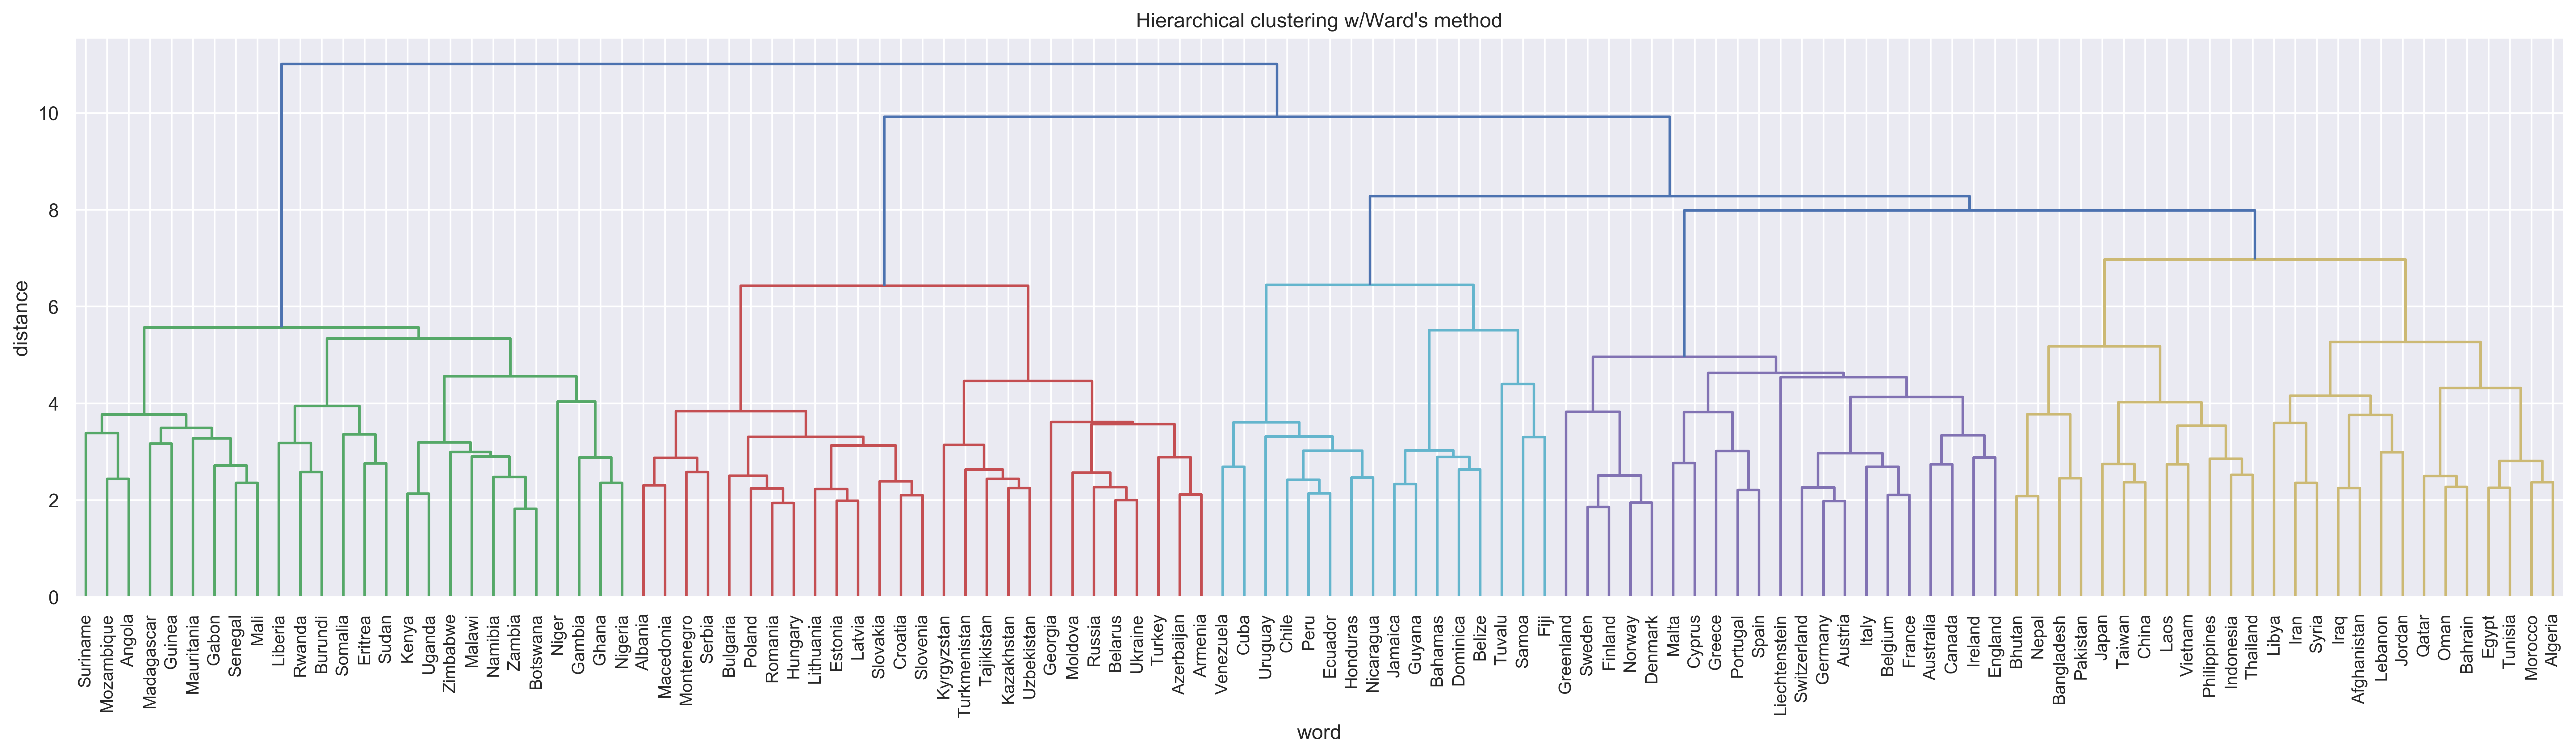

In [26]:
plt.figure(figsize=(26, 6), dpi=400)  # figure sizeの指定
dendrogram(Z, labels=countries, leaf_font_size=10)  # labelsに国名を指定
plt.title('Hierarchical clustering w/Ward\'s method')
plt.xlabel('word')
plt.ylabel('distance')
plt.show()

## 69. t-SNEによる可視化
国名に関する単語ベクトルのベクトル空間をt-SNEで可視化せよ．

In [18]:
from sklearn.manifold import TSNE

In [19]:
con_embedded = TSNE(n_components=2).fit_transform(country_vectors)  # n_componentsは埋め込む次元数
con_embedded.shape  # 形状チェック

(116, 2)

In [40]:
print(con_embedded[:, 0].shape)

(116,)


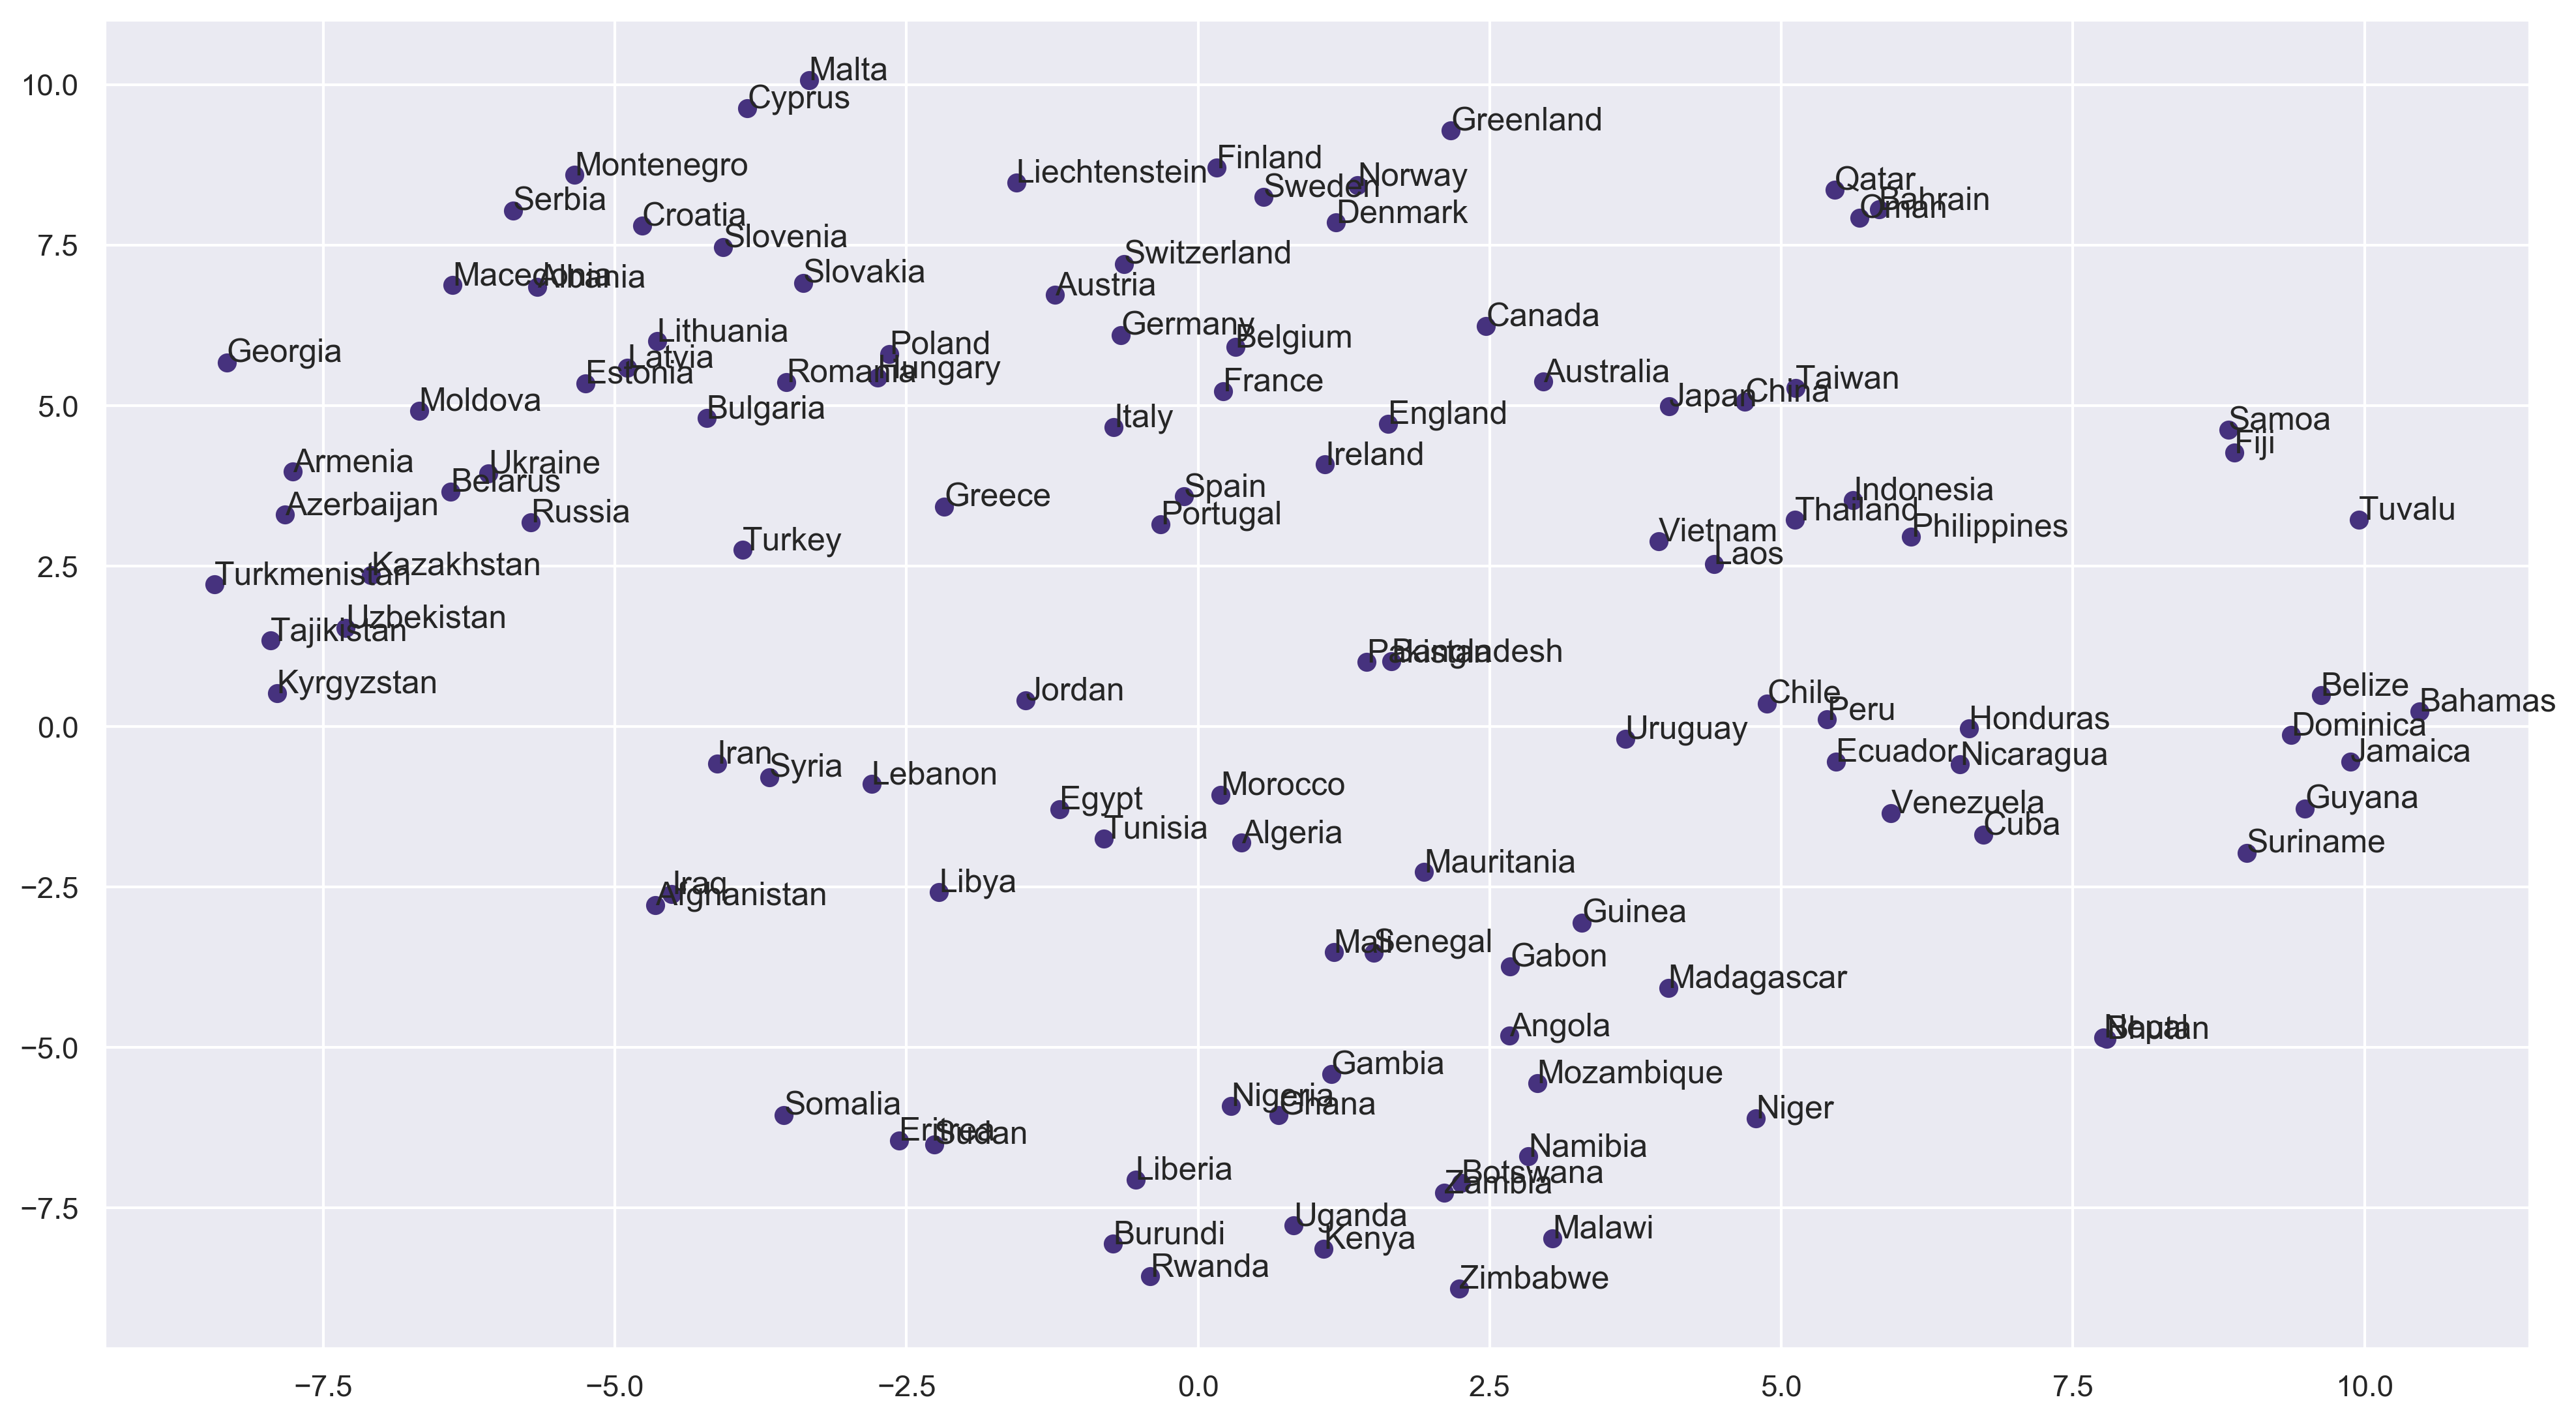

In [20]:
plt.figure(figsize=(16, 9), dpi=300)
plt.scatter(con_embedded[:,0], con_embedded[:,1])

for name, vector in zip(countries, con_embedded):
    plt.annotate(name, vector)  # ベクトルにアノテーション
plt.show()

In [31]:
from logzero import logger
def country2color(country, kmeans_results):
    label2color = {0:'g', 1:'r', 2:'c', 3:'m', 4:'y'}  # ラベルと色の変換辞書
    for label, names in kmeans_results.items():
        if country in names:  # クラスタ内に対象の国名が存在すればそのクラスラベルを返す
            return label2color[label]
    logger.warning('クラスタに存在しない国名です・黒でプロットします')
    return 'k'  # クラスタ内に存在しなかった場合

In [32]:
print(country2color('Bahrain', classes))

y


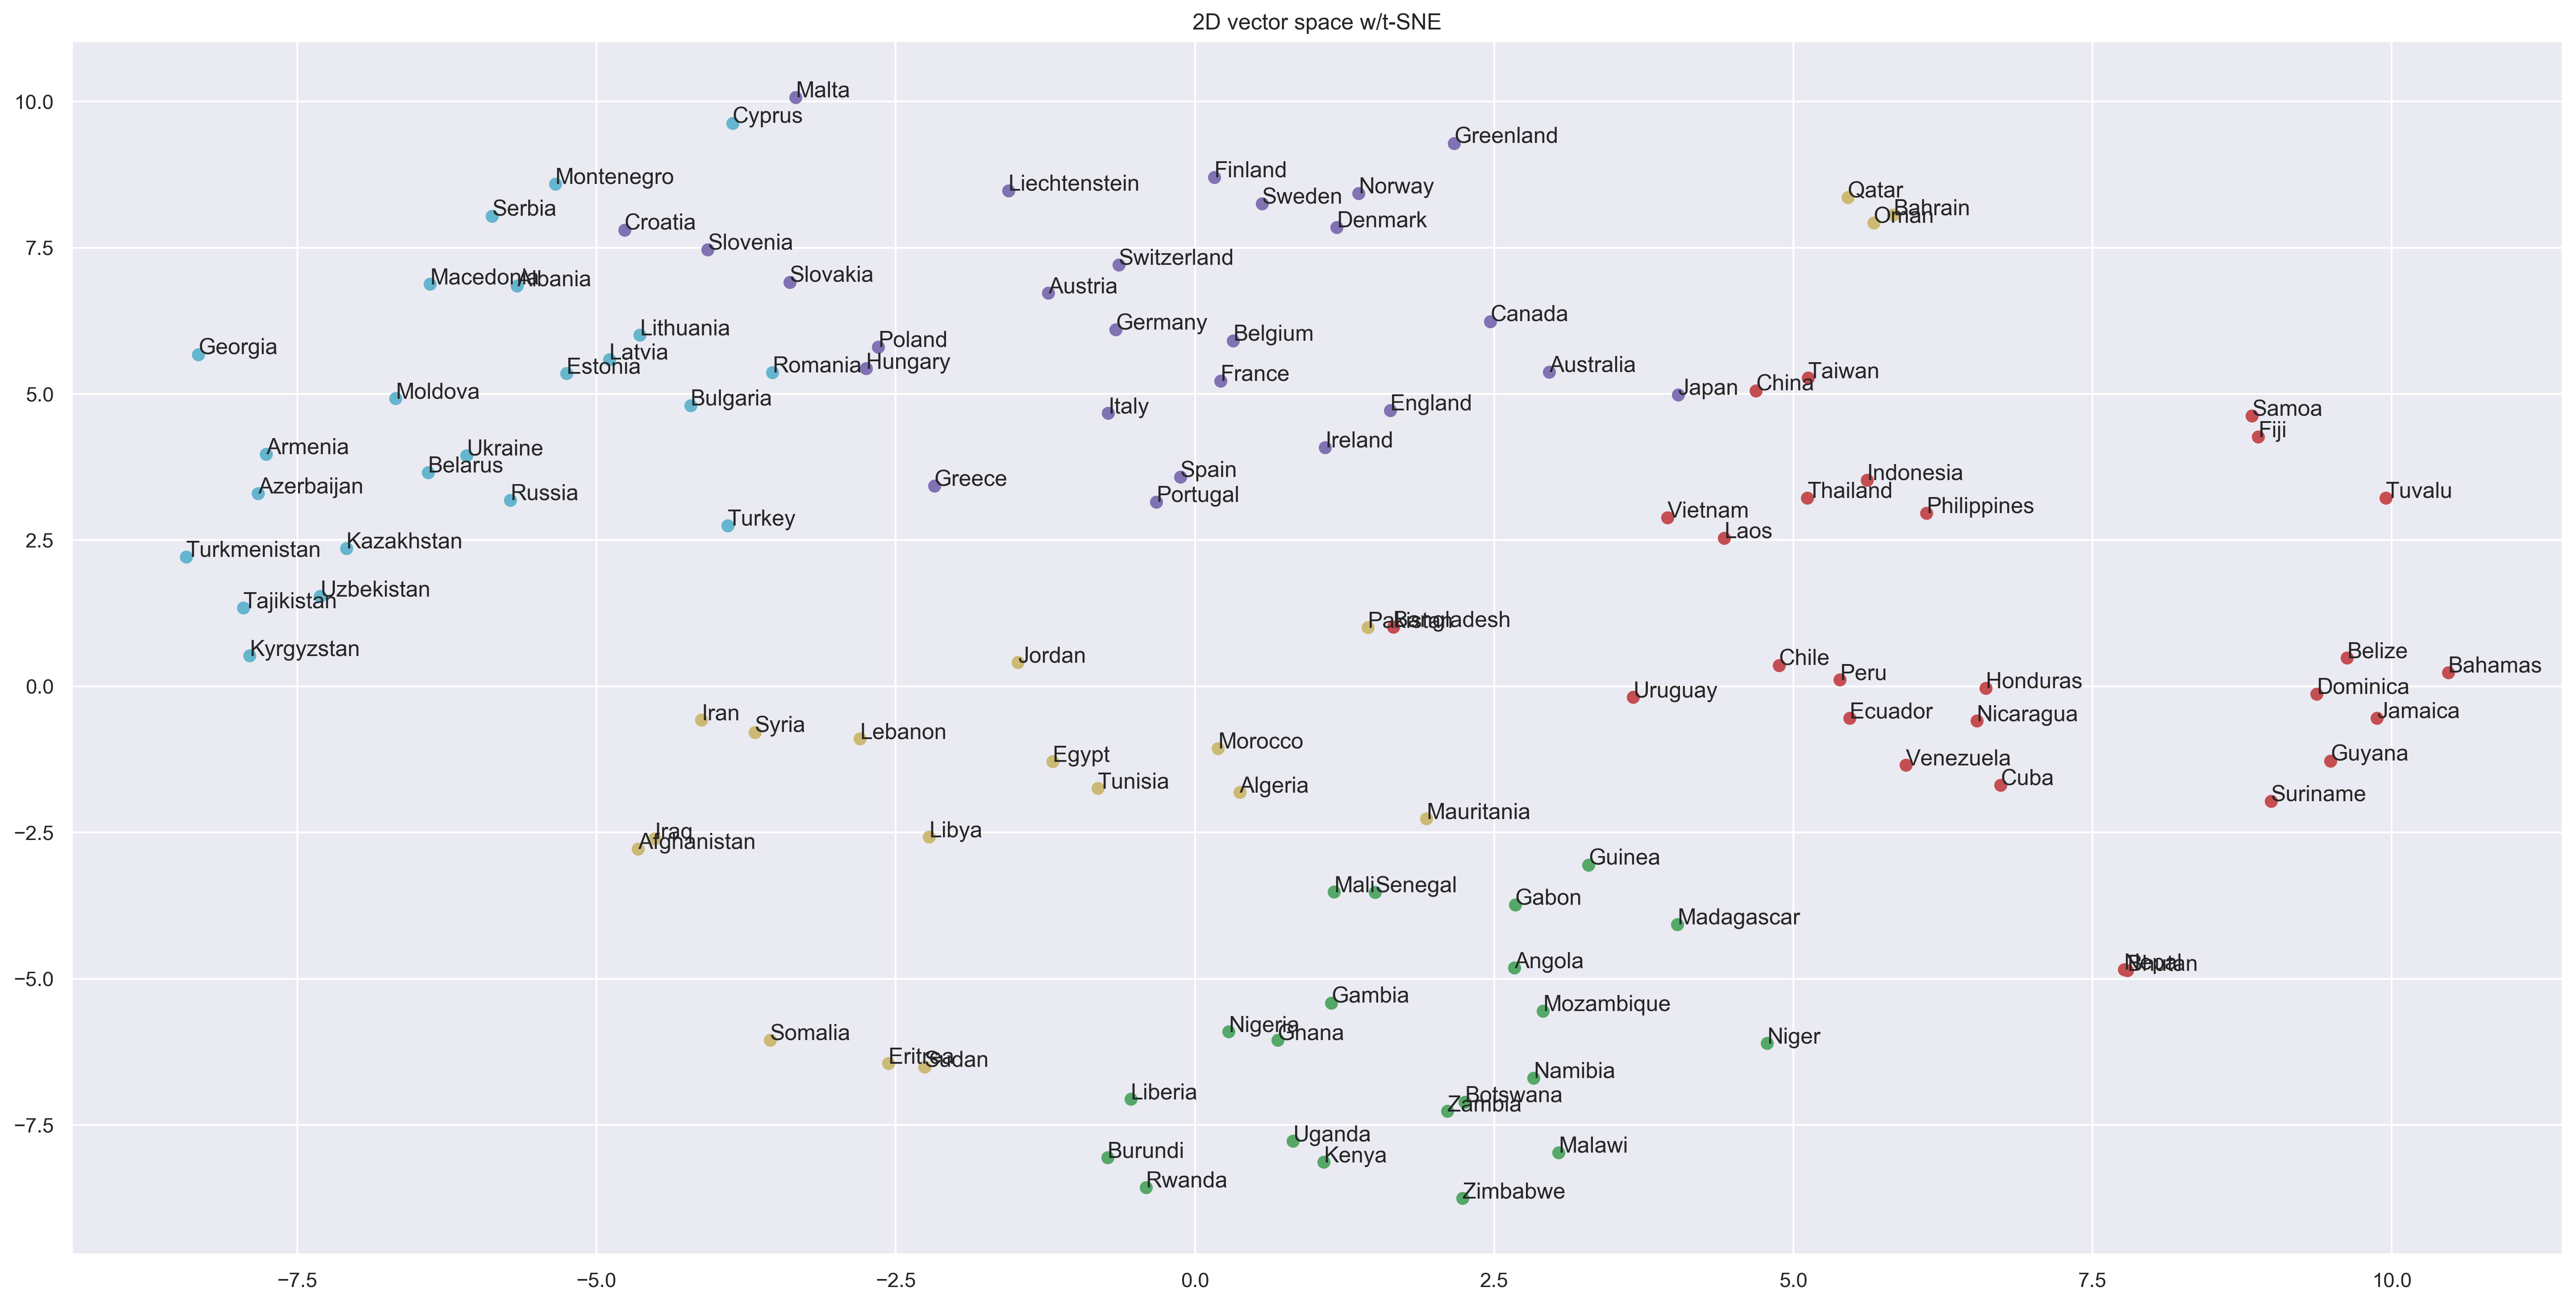

In [36]:
plt.figure(figsize=(24, 12), dpi=300)

for name, vector in zip(countries, con_embedded):
    x,y = vector
    plt.scatter(x, y, c=country2color(name, classes))  # ベクトルを指定のカラーでプロット
    

for name, vector in zip(countries, con_embedded):
    plt.annotate(name, vector)  # ベクトルにアノテーション

plt.title('2D vector space w/t-SNE')
plt.show()